Assignmnet_1_Part_3.2

In [1]:
#Download All Necessary Python Package required for K Means Clustering
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


Shape of Data:  (60000, 28, 28)
Type of Data:  <class 'numpy.ndarray'>


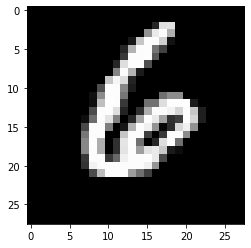

In [2]:
#Load MNIST data from tensorflow datasets and visualize the sample
(x, _), (_,_) = mnist.load_data()
print("Shape of Data: ", x.shape)
print("Type of Data: ", type(x))
plt.imshow(x[13,:,:],cmap=plt.cm.gray)

In [3]:
# Reshape the dataset from (60000, 28, 28) to (60000, 746)
x = x.reshape(60000, 28*28)
print("New Shape :", x.shape)

New Shape : (60000, 784)


In [4]:
#Normalize Image Pixel value by dividing 255. So variance would be between 0.0 to 1.0
print("Maximum Value Before Normalization:",np.amax(x[0,:]))
x = x.astype(np.float32)/255.
print("Maximum Value after Normalization:",np.amax(x[0,:]))

Maximum Value Before Normalization: 255
Maximum Value after Normalization: 1.0


In [5]:
#Mehtod to display the Images
def show_images(images):
    images = images.reshape(images.shape[0],28,28)
    images = images * 255
    plt.figure(figsize = (10,9))
    bottom = 0.35
    for i in range(images.shape[0]):
     plt.subplots_adjust(bottom)
     plt.subplot(5,5,i+1)
     #plt.title("Number:{}".format(reference_labels[i]),fontsize = 17)
     plt.imshow(images[i],cmap=plt.cm.gray)
    plt.show()

In [6]:
#Take a portion of MNIST Data
z = x[0:60000,:]

In [7]:
#Create DataFrame to Save the values of Inertia / J_clust and values of centroids
result_df = pd.DataFrame([], columns=['iter_i','iter_j', 'inertia', 'centroids'])

K = 20 # Numbers of Clusters
P = 30 # Numers of Experiments
Q = 30 # Number of Iterations
for i in range(1,P+1):
    # Initialize the Random Clusters from MNIST Datasets on each iter
    random_indices = np.random.randint(low=0, high=z.shape[0], size=K, dtype=int)
    clusters_init = z[random_indices]
    print(i)
    for j in range(1,Q+1):
        minibatch_kmeans = MiniBatchKMeans(n_clusters=K,init = clusters_init,batch_size=1024,n_init=1,max_iter=1,verbose=0)
        minibatch_kmeans.fit(z)
        
        inertia = minibatch_kmeans.inertia_
        clusters_init = minibatch_kmeans.cluster_centers_
        df = pd.DataFrame({'iter_i':[i],'iter_j':[j], 'inertia':[inertia], 'centroids':[clusters_init]})
        result_df = result_df.append(df)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


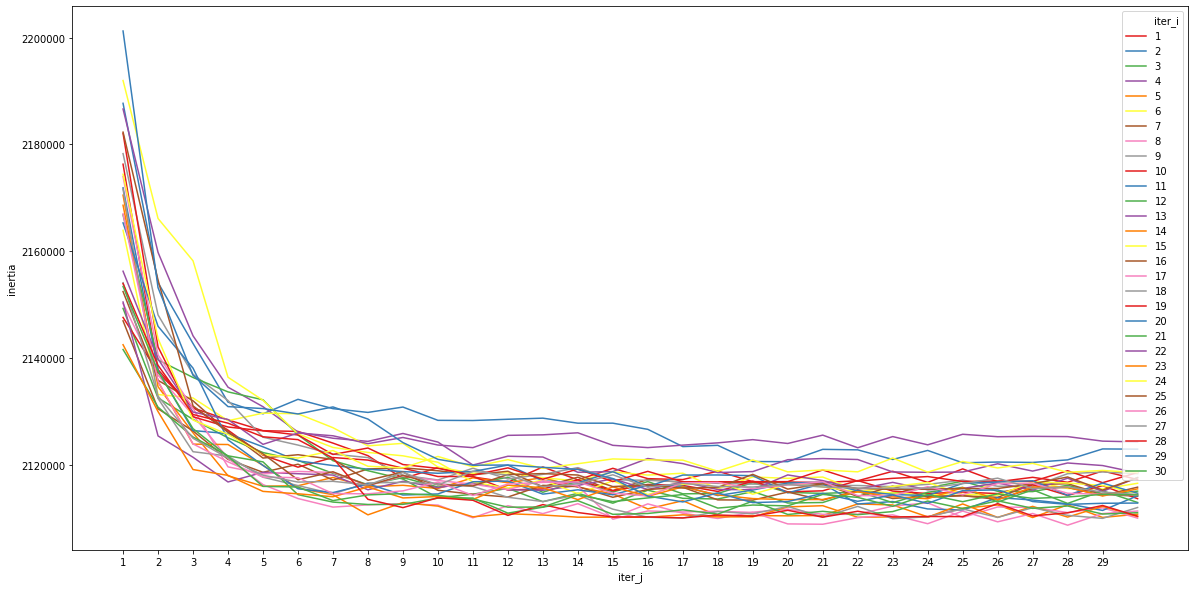

In [8]:
#Plot the J_clust / Inertia for each Iteration
import seaborn as sns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 10)
xaxis=np.arange(1, Q, 1, dtype=int)
ax1.set_xticks(xaxis)
sns.lineplot(data=result_df,x='iter_j',y='inertia',markers=True,hue='iter_i',palette=sns.color_palette("Set1", result_df.iter_i.nunique()))
plt.show()

In [9]:
#Find Two Iteration, on which, J_clust/ Inertia was highest and lowest upon convergence.
new_df = result_df.loc[(result_df['iter_j']==12)][['iter_i','iter_j','inertia']]
min_iter = new_df.loc[new_df['inertia']==new_df['inertia'].min()]['iter_i'].values
max_iter = new_df.loc[new_df['inertia']==new_df['inertia'].max()]['iter_i'].values
print("Maximum_inertia_iter:",max_iter[0])
print("Minimum_inertia_iter",min_iter[0])


Maximum_inertia_iter: 2
Minimum_inertia_iter 28


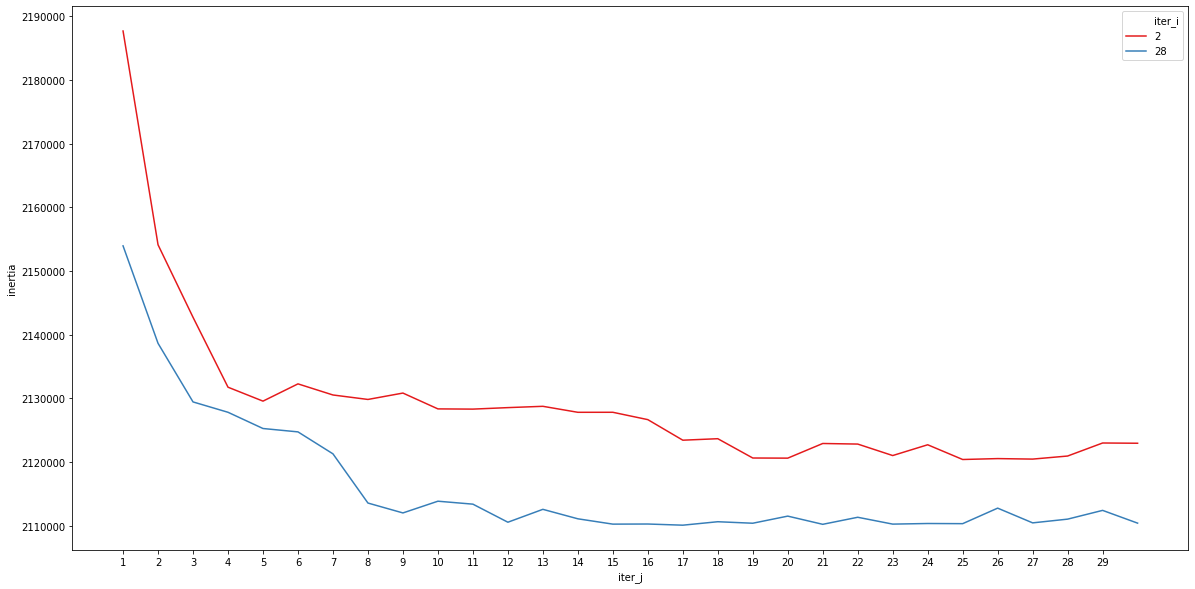

In [10]:
#Plot the Highest and Lowest J_clust / Inertia in respect of Iterations
n_df = result_df.loc[(result_df['iter_i']==max_iter[0])|(result_df['iter_i']==min_iter[0])][['iter_i','iter_j','inertia']]
n_df['iter_i'] = n_df['iter_i'].astype('str')
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 10)
xaxis=np.arange(1, Q, 1, dtype=int)
ax1.set_xticks(xaxis)
sns.lineplot(data=n_df,x='iter_j',y='inertia',markers=True,hue='iter_i',palette=sns.color_palette("Set1", n_df.iter_i.nunique()))
plt.show()

J_clust is Minimum


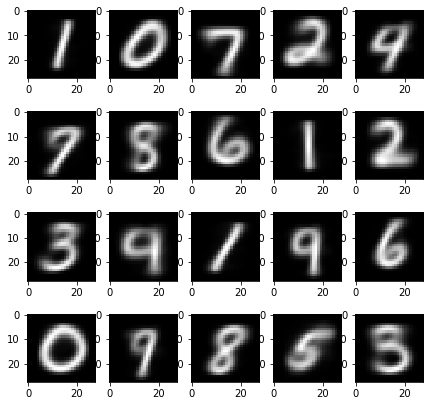

In [11]:
#Display the images of Clusters, when J_clust/ Inertia is Minimum.
print("J_clust is Minimum")
centroids_min = result_df.loc[((result_df['iter_i']==min_iter[0])&(result_df['iter_j']==12))]['centroids'].to_numpy()
centroids_min = centroids_min[0]
show_images(centroids_min)

J_clust is Maximum


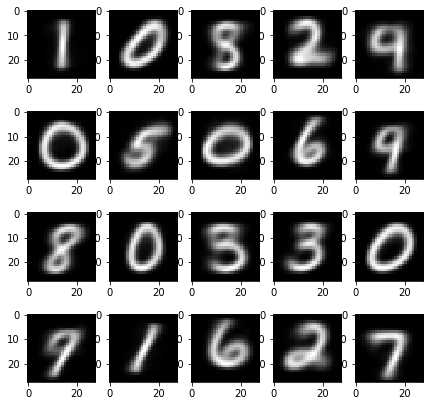

In [12]:
#Display the images of Clusters, when J_clust/ Inertia is Maximum.
print("J_clust is Maximum")
centroids_max = result_df.loc[((result_df['iter_i']==max_iter[0])&(result_df['iter_j']==12))]['centroids'].to_numpy()
centroids_max = centroids_max[0]
show_images(centroids_max)

In [13]:
# Method to find Nearest Ten Neighbours of Centroids
def squared_dist(u,v):
        return np.sum(np.square(u-v))
    
def find_ten_nn(x_cent):
        distances = [squared_dist(z[i,],x_cent) for i in range(len(z))]
        max_val = np.argmax(distances)
        nearest_ten_indice = []
        for i in range(10):
            nearest_ten_indice.append(np.argmin(distances))
            distances[nearest_ten_indice[i]] = distances[max_val]
        
        nearest_ten_nn = z[nearest_ten_indice]   
        return nearest_ten_nn

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 1
The Image of Centroid Cluster and Ten Nearest Neighbours:


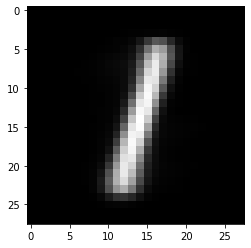

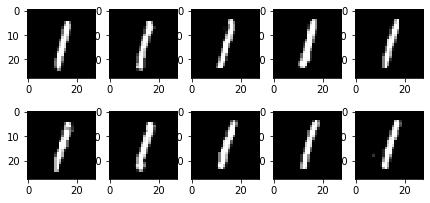

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 2
The Image of Centroid Cluster and Ten Nearest Neighbours:


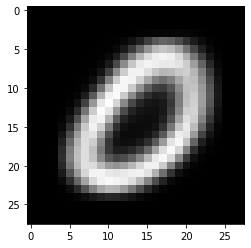

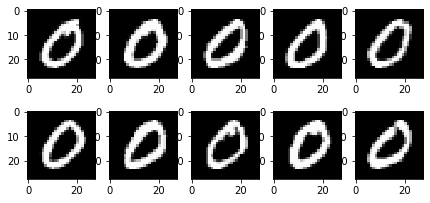

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 3
The Image of Centroid Cluster and Ten Nearest Neighbours:


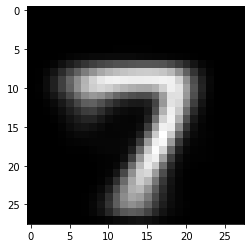

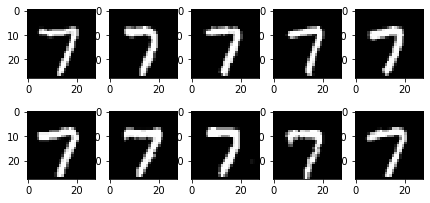

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 4
The Image of Centroid Cluster and Ten Nearest Neighbours:


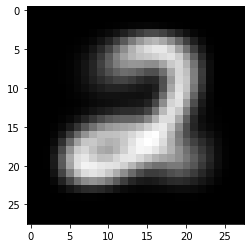

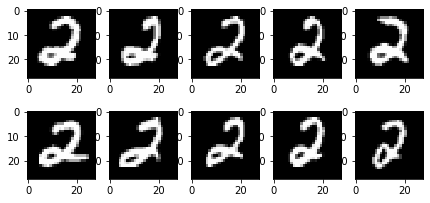

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 5
The Image of Centroid Cluster and Ten Nearest Neighbours:


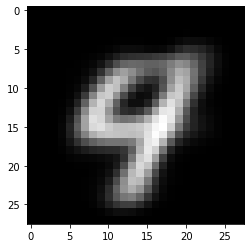

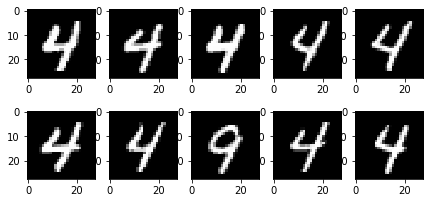

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 6
The Image of Centroid Cluster and Ten Nearest Neighbours:


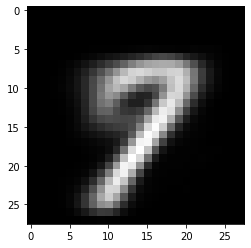

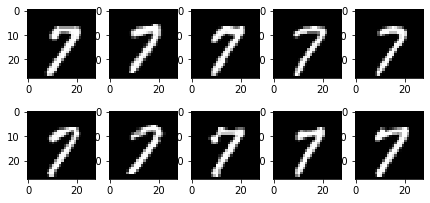

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 7
The Image of Centroid Cluster and Ten Nearest Neighbours:


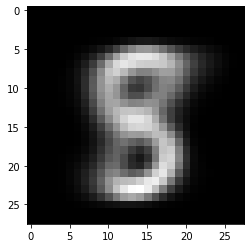

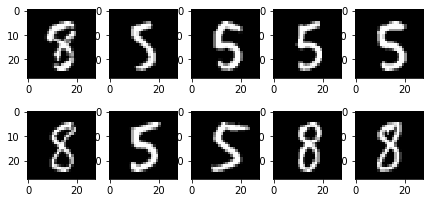

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 8
The Image of Centroid Cluster and Ten Nearest Neighbours:


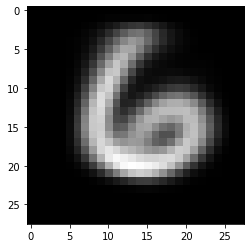

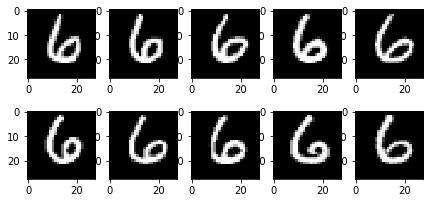

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 9
The Image of Centroid Cluster and Ten Nearest Neighbours:


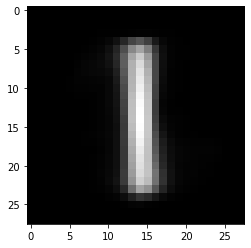

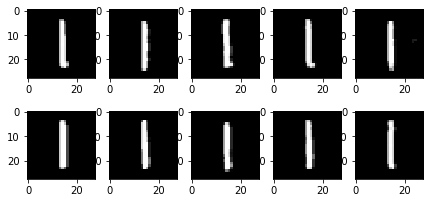

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 10
The Image of Centroid Cluster and Ten Nearest Neighbours:


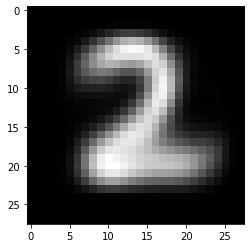

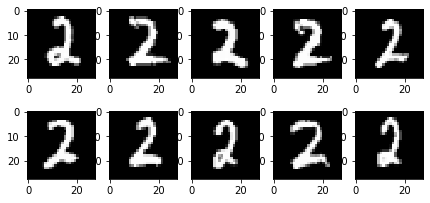

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 11
The Image of Centroid Cluster and Ten Nearest Neighbours:


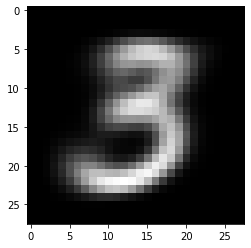

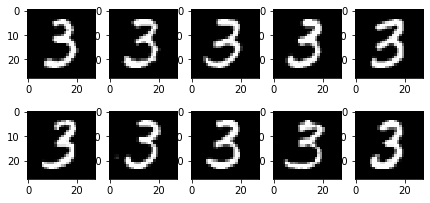

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 12
The Image of Centroid Cluster and Ten Nearest Neighbours:


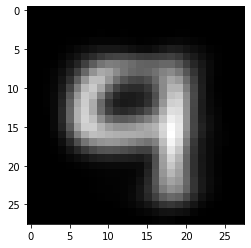

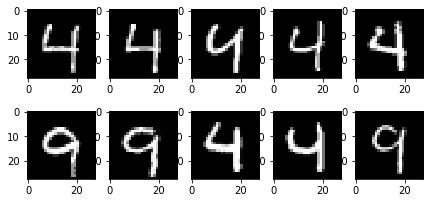

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 13
The Image of Centroid Cluster and Ten Nearest Neighbours:


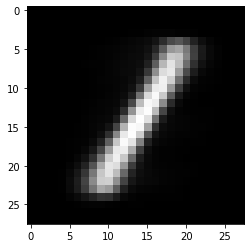

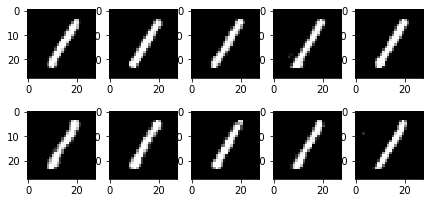

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 14
The Image of Centroid Cluster and Ten Nearest Neighbours:


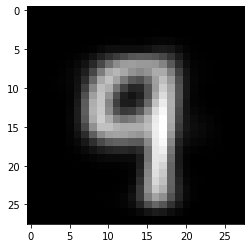

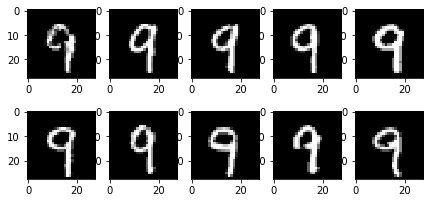

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 15
The Image of Centroid Cluster and Ten Nearest Neighbours:


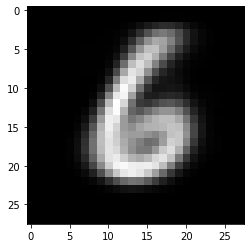

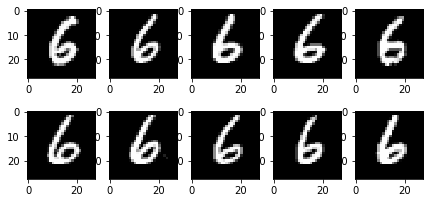

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 16
The Image of Centroid Cluster and Ten Nearest Neighbours:


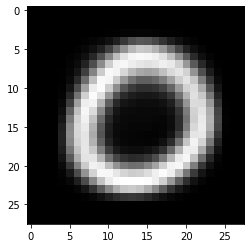

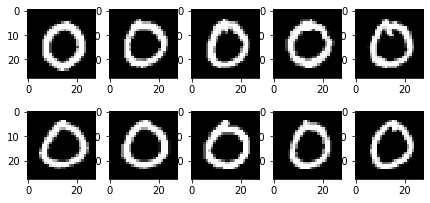

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 17
The Image of Centroid Cluster and Ten Nearest Neighbours:


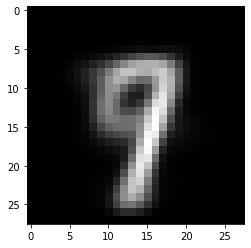

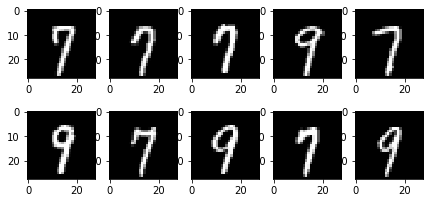

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 18
The Image of Centroid Cluster and Ten Nearest Neighbours:


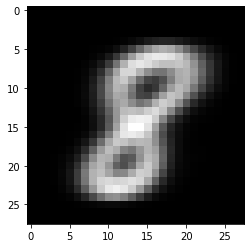

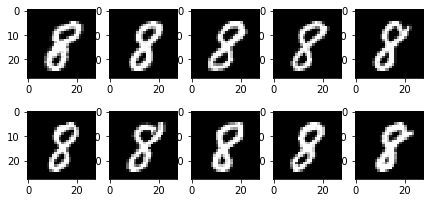

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 19
The Image of Centroid Cluster and Ten Nearest Neighbours:


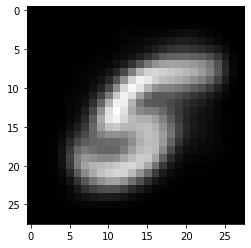

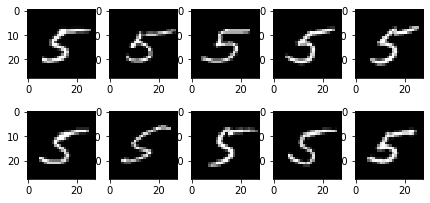

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 20
The Image of Centroid Cluster and Ten Nearest Neighbours:


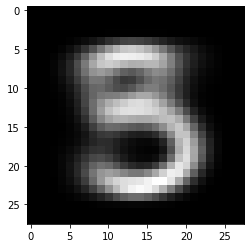

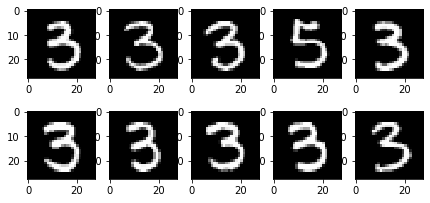

In [14]:
#Find and Display the Ten Nearest Neighbours along with Centroids Images
centroids = centroids_min
for k in range(centroids.shape[0]):
    print("--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id:",k+1)
    print("The Image of Centroid Cluster and Ten Nearest Neighbours:")
    plt.imshow(centroids[k].reshape(28,28),cmap=plt.cm.gray)
    images = find_ten_nn(centroids[k].reshape(28*28))
    show_images(images)
plt.show()

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 1
The Image of Centroid Cluster and Ten Nearest Neighbours:


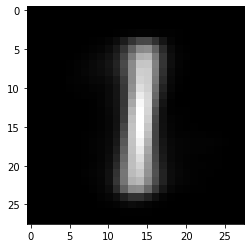

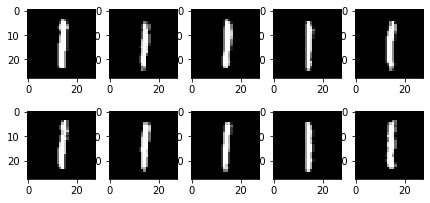

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 2
The Image of Centroid Cluster and Ten Nearest Neighbours:


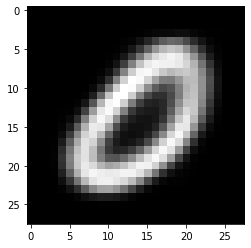

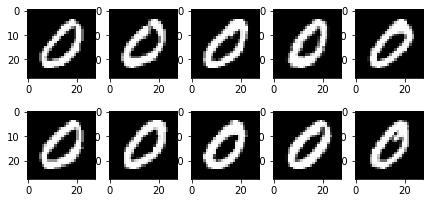

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 3
The Image of Centroid Cluster and Ten Nearest Neighbours:


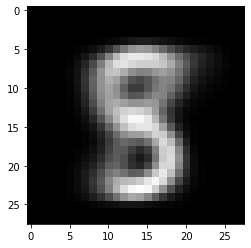

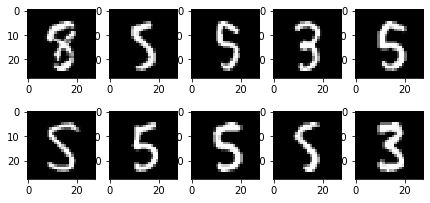

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 4
The Image of Centroid Cluster and Ten Nearest Neighbours:


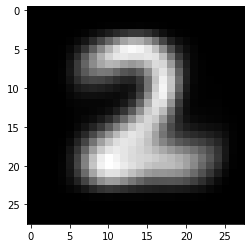

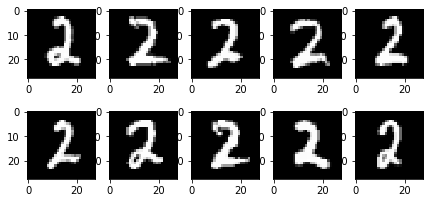

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 5
The Image of Centroid Cluster and Ten Nearest Neighbours:


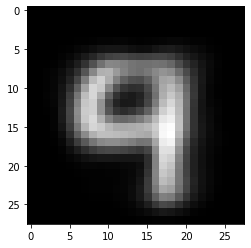

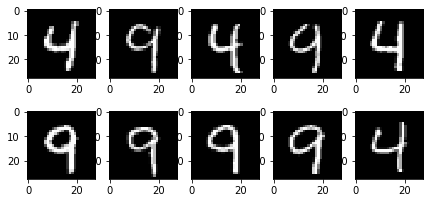

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 6
The Image of Centroid Cluster and Ten Nearest Neighbours:


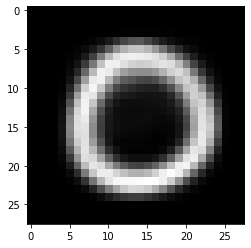

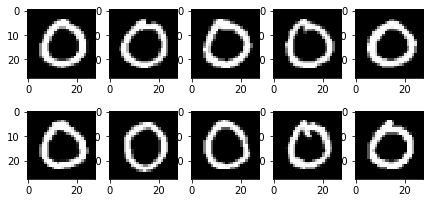

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 7
The Image of Centroid Cluster and Ten Nearest Neighbours:


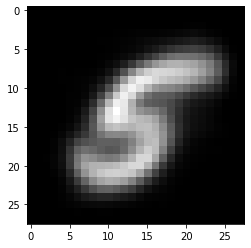

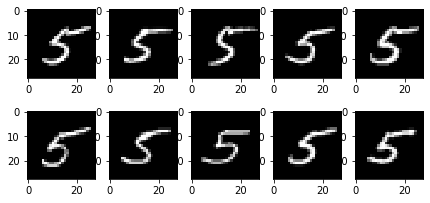

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 8
The Image of Centroid Cluster and Ten Nearest Neighbours:


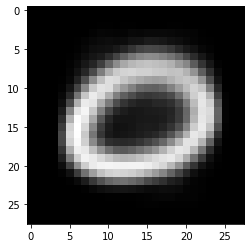

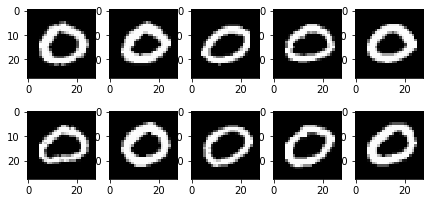

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 9
The Image of Centroid Cluster and Ten Nearest Neighbours:


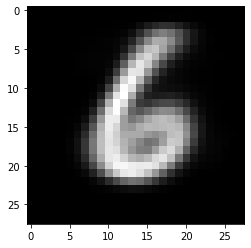

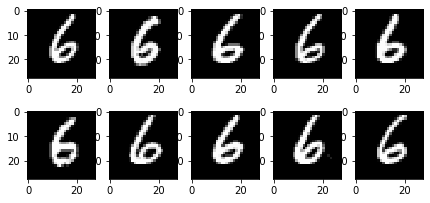

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 10
The Image of Centroid Cluster and Ten Nearest Neighbours:


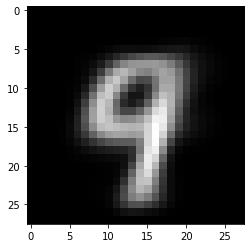

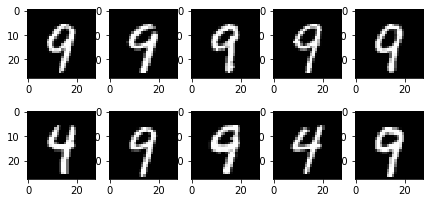

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 11
The Image of Centroid Cluster and Ten Nearest Neighbours:


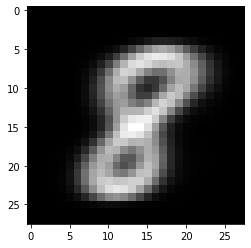

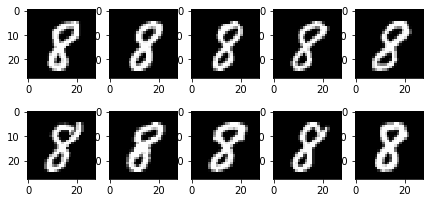

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 12
The Image of Centroid Cluster and Ten Nearest Neighbours:


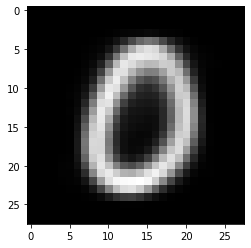

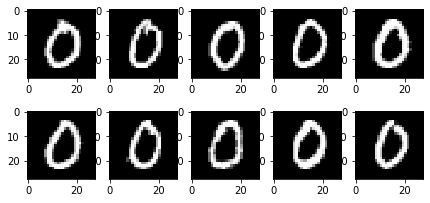

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 13
The Image of Centroid Cluster and Ten Nearest Neighbours:


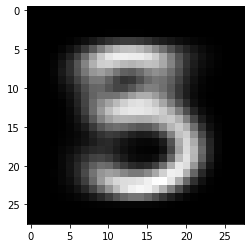

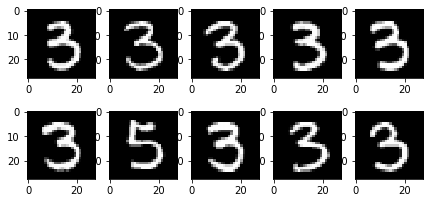

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 14
The Image of Centroid Cluster and Ten Nearest Neighbours:


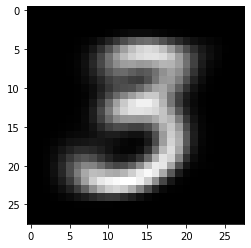

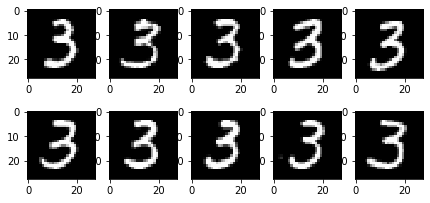

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 15
The Image of Centroid Cluster and Ten Nearest Neighbours:


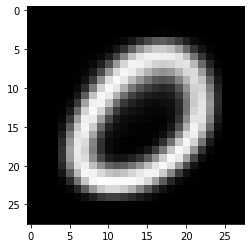

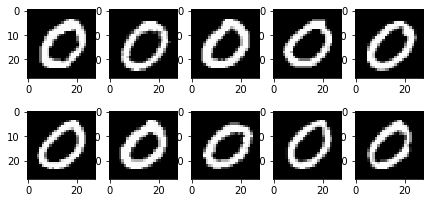

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 16
The Image of Centroid Cluster and Ten Nearest Neighbours:


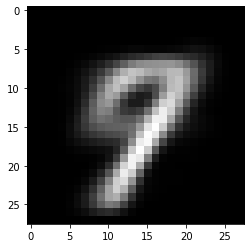

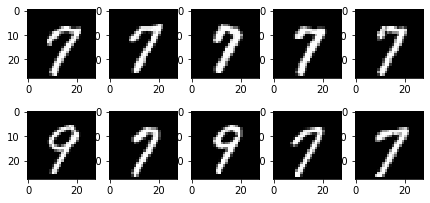

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 17
The Image of Centroid Cluster and Ten Nearest Neighbours:


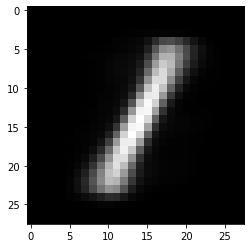

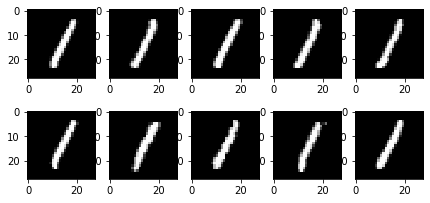

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 18
The Image of Centroid Cluster and Ten Nearest Neighbours:


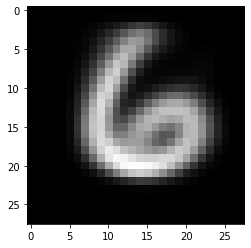

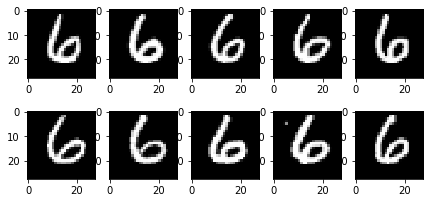

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 19
The Image of Centroid Cluster and Ten Nearest Neighbours:


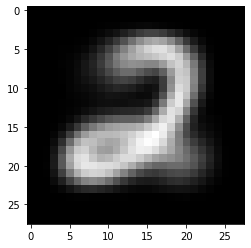

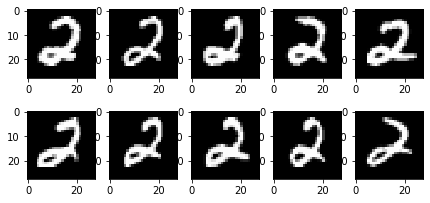

--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id: 20
The Image of Centroid Cluster and Ten Nearest Neighbours:


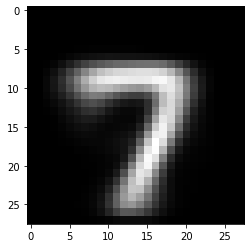

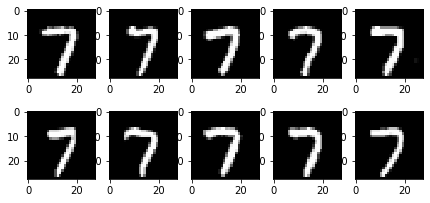

In [15]:
#Find and Display the Ten Nearest Neighbours along with Centroids Images
centroids = centroids_max
for k in range(centroids.shape[0]):
    print("--------------------xxxxxxxxxxxxxxxxxxxx--------------------------Centroids Id:",k+1)
    print("The Image of Centroid Cluster and Ten Nearest Neighbours:")
    plt.imshow(centroids[k].reshape(28,28),cmap=plt.cm.gray)
    images = find_ten_nn(centroids[k].reshape(28*28))
    show_images(images)
plt.show()